In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('ggplot')
%matplotlib inline

In [2]:
survey_2018 = pd.read_csv('./resources/04_Kaggle_Survey_2018.csv')
survey_2018 = survey_2018.drop([0],axis=0)
survey_2018.head(2)

//anaconda2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [3]:
total_2018 = survey_2018['Time from Start to Finish (seconds)'].count()
total_2018

23859

In [4]:
databases = survey_2018[['Q33_Part_1',
                              'Q33_Part_2',
                              'Q33_Part_3',
                              'Q33_Part_4',
                              'Q33_Part_5',
                              'Q33_Part_6',
                              'Q33_Part_7',
                              'Q33_Part_8',
                              'Q33_Part_9',
                              'Q33_Part_10',
                              'Q33_Part_11']]
databases

,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Government websites,NaN,NaN,"Dataset aggregator/platform (Socrata, Kaggle P...",NaN,NaN,NaN,NaN,GitHub,NaN,NaN
4,Government websites,NaN,NaN,"Dataset aggregator/platform (Socrata, Kaggle P...","I collect my own data (web-scraping, etc.)",NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,Publicly released data from private companies,NaN,NaN,NaN,NaN,NaN
6,Government websites,University research group websites,Non-profit research group websites,"Dataset aggregator/platform (Socrata, Kaggle P...","I collect my own data (web-scraping, etc.)",Publicly released data from private companies,Google Search,Google Dataset Search,GitHub,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,NaN
8,NaN,NaN,NaN,"Dataset aggregator/platform (Socrata, Kaggle P...",NaN,NaN,Google Search,NaN,NaN,NaN,Other
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,"Dataset aggregator/platform (Socrata, Kaggle P...","I collect my own data (web-scraping, etc.)",NaN,Google Search,Google Dataset Search,NaN,NaN,NaN


In [5]:
gov_website = databases.count()["Q33_Part_1"]
uni_research = databases.count()["Q33_Part_2"] 
non_profit = databases.count()["Q33_Part_3"]
aggregator = databases.count()["Q33_Part_4"]
my_own =  databases.count()["Q33_Part_5"]
publicly_released = databases.count()["Q33_Part_6"]
google_search = databases.count()["Q33_Part_7"]
google_dataset = databases.count()["Q33_Part_8"]
github = databases.count()["Q33_Part_9"]
none = databases.count()["Q33_Part_10"]
other = databases.count()["Q33_Part_11"]

In [6]:
gov_website = (gov_website / total_2018) *100 
uni_research = (uni_research / total_2018) *100 
non_profit = (non_profit / total_2018) *100 
aggregator = (aggregator / total_2018) *100 
my_own =  (my_own / total_2018) *100 
publicly_released = (publicly_released / total_2018) *100 
google_search = (google_search / total_2018) *100 
google_dataset = (google_dataset / total_2018) *100 
github = (github / total_2018) *100 
none = (none / total_2018) *100 
other = (other / total_2018) *100 

In [7]:
databases = pd.DataFrame({'Databases':['Government websites', 
                                       'University research group websites', 
                                       'Non-profit research group websites',
                                       'Dataset aggregator/platform (Socrata, Kaggle,etc)',
                                       'I collect my own data (web-scraping, etc.)',
                                       'Publicly released data from private companies',
                                       'Google Search',
                                       'Google Dataset Search',
                                       'GitHub','None, I do not work w/public data',
                                       'Other'], 
                          'Responses':[gov_website, uni_research, non_profit,aggregator, my_own,publicly_released,
                                       google_search,google_dataset,github,none,other]})

databases = databases.sort_values('Responses')

databases

,Databases,Responses
10,Other,1.881889
9,"None, I do not work w/public data",8.495746
2,Non-profit research group websites,11.769144
5,Publicly released data from private companies,12.561298
7,Google Dataset Search,15.440714
1,University research group websites,17.196865
0,Government websites,19.937969
4,"I collect my own data (web-scraping, etc.)",21.899493
8,GitHub,25.462090
6,Google Search,29.393520


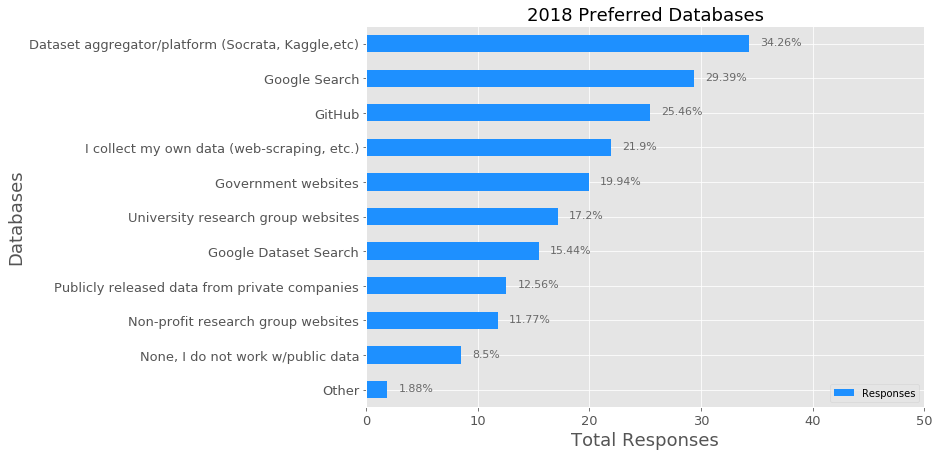

In [8]:
ax = databases[['Responses']].plot(kind='barh',
              figsize=(10,7), color=['dodgerblue', 'slategray'], fontsize=13);
ax.set_alpha(.7)
ax.set_title("2018 Preferred Databases",fontsize=18)
ax.set_xlabel("Total Responses", fontsize=18)
ax.set_ylabel("Databases", fontsize=18)
ax.set_xticks([0, 10, 20, 30, 40, 50])
ax.set_yticklabels(databases['Databases'])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+.20, \
            str(round((i.get_width()), 2))+'%', fontsize=11, color='dimgrey')

fig = ax.get_figure()

# invert for largest on top 
#ax.invert_yaxis()
ax.legend(loc='lower right')
plt.show()
fig.tight_layout()
fig.savefig("preferred_databases.png")